# Import necessary libraries

In [ ]:
# Import NumPy for numerical computations
import numpy as np

# Import Pandas for data manipulation
import pandas as pd

# Import Matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Seaborn for enhanced data visualization
import seaborn as sns

# Import accuracy_score from sklearn.metrics to evaluate model performance
from sklearn.metrics import accuracy_score

# Import train_test_split from sklearn.model_selection to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import OrdinalEncoder from sklearn.preprocessing to encode categorical variables
from sklearn.preprocessing import OrdinalEncoder

# Import DecisionTreeClassifier from sklearn.tree for building a decision tree classifier

# Import the DecisionTreeClassifier from sklearn.tree to create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Read the dataset from the CSV file

In [2]:
df = pd.read_csv(r'C:\Users\Esmail\Downloads\Sleep_health_and_lifestyle_dataset.csv')


# Replace 'Normal Weight' with 'Normal' in the 'BMI Category' column 

In [3]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')


# Check the shape of the DataFrame


In [4]:
print(df.shape)

(374, 13)


# Check for missing values in the DataFrame


In [5]:
print(df.isnull().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


# Insert 'Age Group' column based on 'Age' column values


In [6]:
df['Age Group'] = pd.cut(x=df['Age'], bins=[0, 16, 30, 45, 100],
                         labels=['Child', 'Young Adults', 'Middle-aged Adults', 'Old Adults'])


# Display the first 10 rows of the DataFrame


In [7]:
print(df.head(10))

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60    

 # Count the occurrences of different values in the 'Sleep Disorder' column


In [8]:
print(df['Sleep Disorder'].value_counts())

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64


# Create bar plots to visualize the count of individuals based on 'Gender', 'BMI Category', and 'Sleep Disorder'


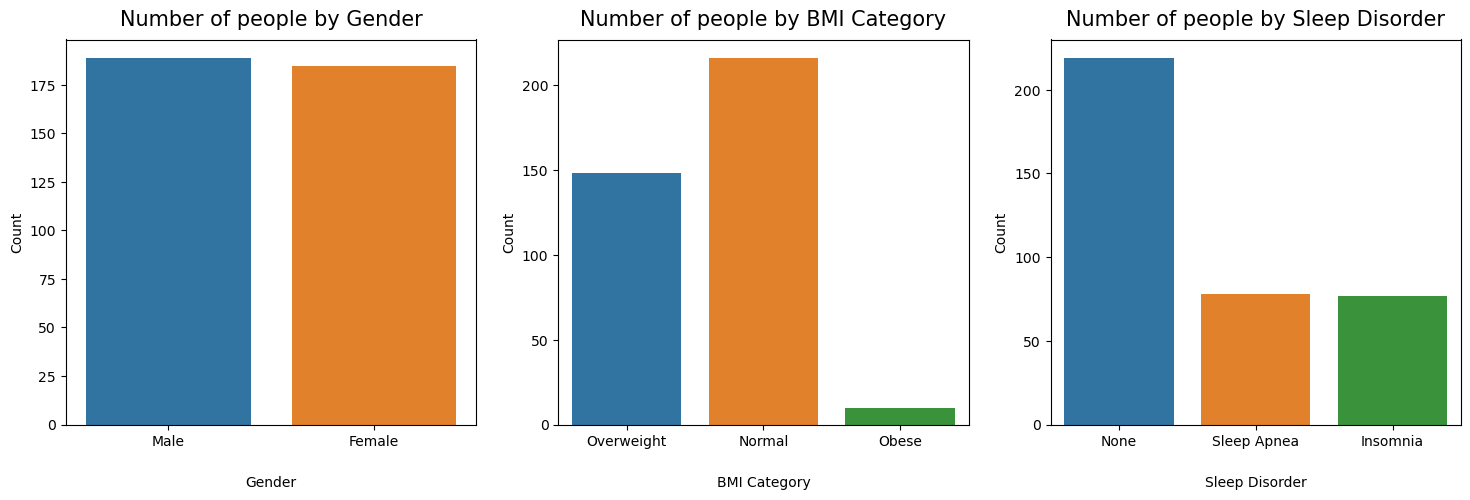

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
columns = ['Gender', 'BMI Category', 'Sleep Disorder']
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column, labelpad=20)
    axes[i].set_title(f"Number of people by {column}", pad=10, fontsize=15)
plt.show()

# Create a KDE plot to visualize the relationship between 'Age' and 'Sleep Disorder'


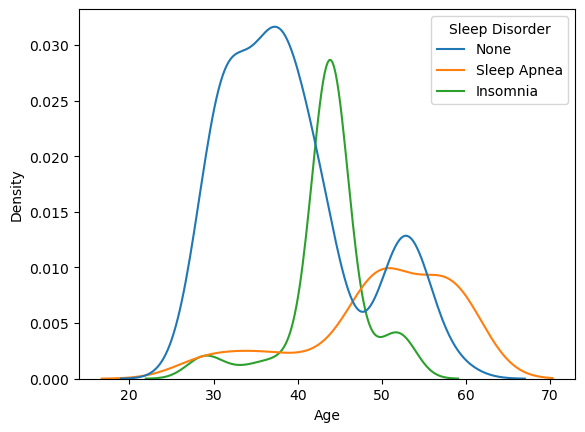

In [10]:
sns.kdeplot(data=df, x='Age', hue='Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


# Count occurrences of unique combinations of 'Gender' and 'Sleep Disorder'

In [11]:
temp_data = []

for index, row in data.iterrows():
    gender = row['Gender']
    disorder = row['Sleep Disorder']
    
    if not any(x[0] == gender and x[1] == disorder for x in temp_data):
        temp_data.append([gender, disorder, 0])
    
    for item in temp_data:
        if item[0] == gender and item[1] == disorder:
            item[2] += 1

display(temp_data)

[['Male', 'None', 137],
 ['Male', 'Sleep Apnea', 11],
 ['Male', 'Insomnia', 41],
 ['Female', 'Sleep Apnea', 67],
 ['Female', 'Insomnia', 36],
 ['Female', 'None', 82]]

# Create a bar plot to visualize the count of individuals based on 'Gender' and 'Sleep Disorder'


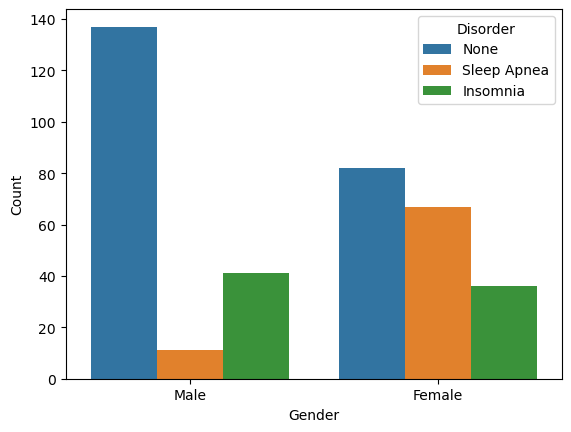

In [12]:
data1 = pd.DataFrame(temp_data, columns=['Gender', 'Disorder', 'Count'])

sns.barplot(x='Gender', y='Count', hue='Disorder', data=data1)

plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

# Create a pair plot to visualize the relationship between factors and 'Quality of Sleep', categorized by 'Gender'


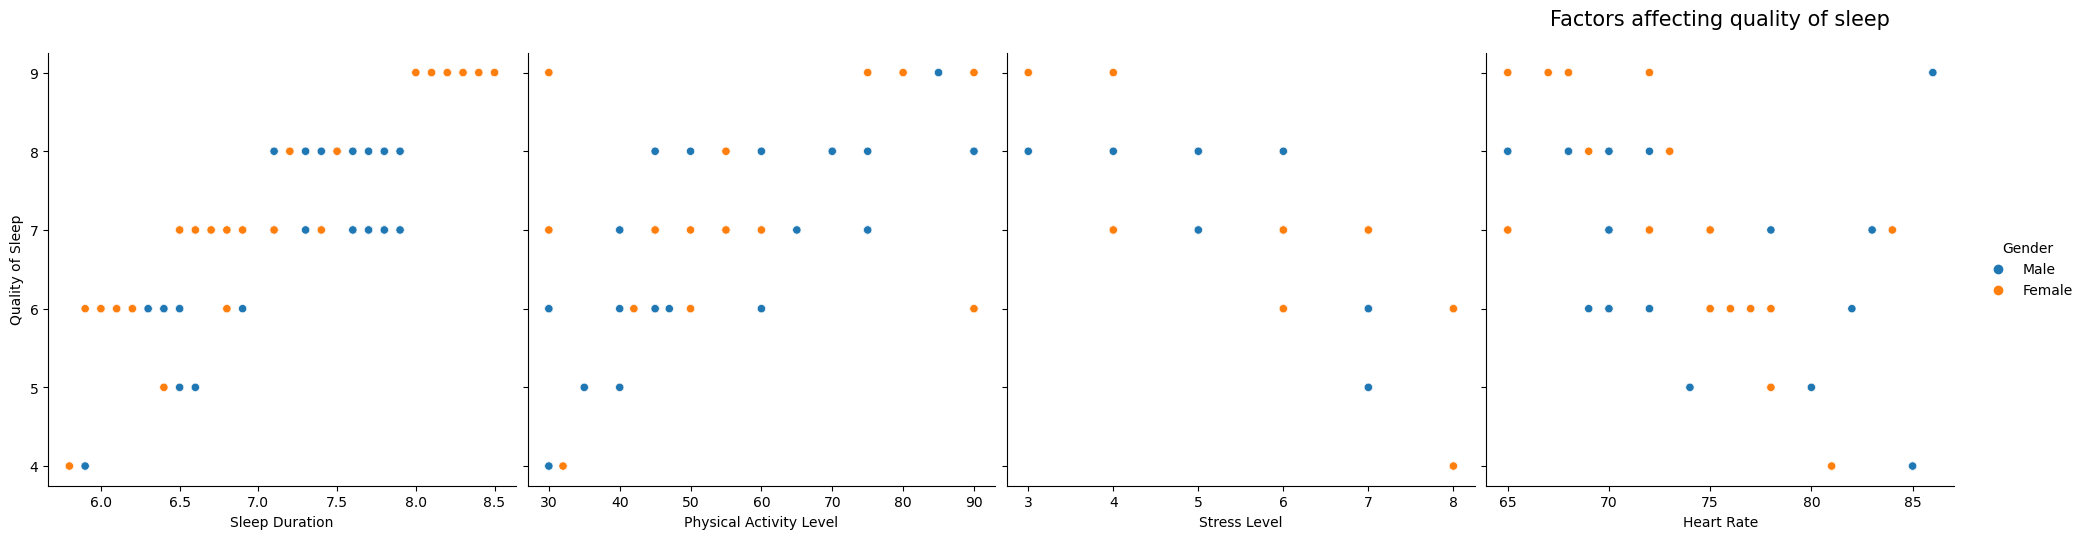

In [13]:
sns.pairplot(data=df, x_vars=['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate'],
             y_vars='Quality of Sleep', hue='Gender', height=5)
plt.title('Factors affecting quality of sleep', pad=20, fontsize=15)
plt.show()


# The algorithm 

In [30]:
# Encoding categorical variables
oe = OrdinalEncoder()
oe.fit(df)
dt = oe.transform(df)
# Separating features and target variable
X = dt[:, :-1]
y = dt[:, -1:]
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)
# Creating and training the decision tree classifier model
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
# Predicting the target variable for the test set
y_pred = model.predict(X_test)
print("accuracy = ",accuracy_score(y_test,y_pred))

accuracy =  0.9866666666666667
